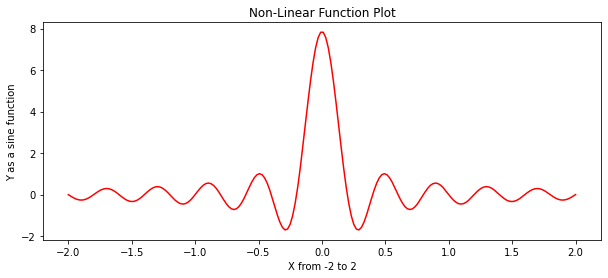

In [1]:
#imports
import numpy as np
import torch
import math
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim

#set up seed for consistancy
torch.manual_seed(1)
np.random.seed(1)

x = torch.unsqueeze(torch.linspace(2,-2,200),dim=1)
y = (np.sin(5*np.pi*x))/(2*x)

#convert into tensors for pytorch
x = x.clone().detach()
y = y.clone().detach()

#plot the non linear function
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Non-Linear Function Plot')
plt.ylabel('Y as a sine function')
plt.xlabel('X from -2 to 2')

plt.show()

In [2]:
#Define model 1 
model_one = nn.Sequential(
                nn.Linear(1,5),
                nn.ReLU(),
                nn.Linear(5,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,5),
                nn.ReLU(),
                nn.Linear(5,1)
                )
#Define model 2 
model_two = nn.Sequential(
                nn.Linear(1,10),
                nn.ReLU(),
                nn.Linear(10,18),
                nn.ReLU(),
                nn.Linear(18,15),
                nn.ReLU(),
                nn.Linear(15,4),
                nn.ReLU(),
                nn.Linear(4,1)
)
#Define model 3
model_three = nn.Sequential(
                nn.Linear(1,190),
                nn.ReLU(),
                nn.Linear(190,1)
)
pytorch_total_params = sum(p.numel() for p in model_two.parameters())
print(pytorch_total_params)

572


In [3]:
#Optimizer with model one parameter
optimizer_SGD = optim.SGD(model_one.parameters(), lr=0.01, momentum=0.9)

In [4]:
#loss function mean squared error
mean_s_loss_func = torch.nn.MSELoss() 

In [5]:
def gradientLoop(model,x,y,epoch_range):
    n_epoch = []
    n_epoch_err = []
    for epoch in range(epoch_range):
        n_epoch.append(epoch)
        y_predicted = model(x)
        loss = mean_s_loss_func(y_predicted, y)
        loss.backward()
        n_epoch_err.append(loss.detach().numpy())
        optimizer_SGD.step()
        optimizer_SGD.zero_grad()
        if epoch%500 == 0:
            print('Epoch ', epoch,' Loss ', loss.detach().numpy())
    return n_epoch,n_epoch_err,y_predicted

In [6]:
#find prediction,loss for model one
model_one_epochs,model_one_err,model_one_prediction = gradientLoop(model_one,x,y,20000)

Epoch  0  Loss  2.8955865
Epoch  500  Loss  2.8911364
Epoch  1000  Loss  2.8911273
Epoch  1500  Loss  2.8911037
Epoch  2000  Loss  2.8910258
Epoch  2500  Loss  2.890407
Epoch  3000  Loss  0.47463393
Epoch  3500  Loss  0.10876614
Epoch  4000  Loss  0.075126976
Epoch  4500  Loss  0.06791179
Epoch  5000  Loss  0.09489952
Epoch  5500  Loss  0.06825542
Epoch  6000  Loss  0.059186846
Epoch  6500  Loss  0.059866868
Epoch  7000  Loss  0.05505095
Epoch  7500  Loss  0.053141855
Epoch  8000  Loss  0.054417554
Epoch  8500  Loss  0.048549347
Epoch  9000  Loss  0.04593643
Epoch  9500  Loss  0.030843545
Epoch  10000  Loss  0.02996479
Epoch  10500  Loss  0.028441656
Epoch  11000  Loss  0.025287587
Epoch  11500  Loss  0.025301235
Epoch  12000  Loss  0.02551385
Epoch  12500  Loss  0.024747262
Epoch  13000  Loss  0.024763322
Epoch  13500  Loss  0.024827125
Epoch  14000  Loss  0.024743402
Epoch  14500  Loss  0.024685144
Epoch  15000  Loss  0.024613326
Epoch  15500  Loss  0.024603548
Epoch  16000  Loss  0.

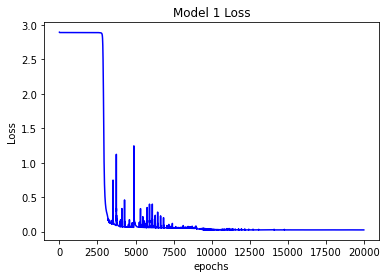

In [7]:
#plot model one epoch vs loss
plt.plot(model_one_epochs,model_one_err,color="blue")
plt.title('Model 1 Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

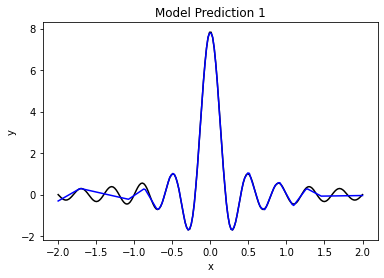

In [8]:
#plot model one predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_one_prediction.data.numpy(),color="blue")
plt.title('Model Prediction 1')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [9]:
#Optimizer with model two parameter
optimizer_SGD = optim.SGD(model_two.parameters(), lr=0.01, momentum=0.9)
#find prediction,loss for model two
model_two_epochs,model_two_err,model_two_prediction = gradientLoop(model_two,x,y,20000)

Epoch  0  Loss  2.9083045
Epoch  500  Loss  0.117355384
Epoch  1000  Loss  0.08561363
Epoch  1500  Loss  0.068461835
Epoch  2000  Loss  0.06024581
Epoch  2500  Loss  0.05576073
Epoch  3000  Loss  0.050155763
Epoch  3500  Loss  0.049725823
Epoch  4000  Loss  0.041021086
Epoch  4500  Loss  0.045996755
Epoch  5000  Loss  0.04387065
Epoch  5500  Loss  0.044398557
Epoch  6000  Loss  0.034226526
Epoch  6500  Loss  0.039042816
Epoch  7000  Loss  0.032877058
Epoch  7500  Loss  0.03513072
Epoch  8000  Loss  0.033314977
Epoch  8500  Loss  0.033083234
Epoch  9000  Loss  0.033136383
Epoch  9500  Loss  0.031061672
Epoch  10000  Loss  0.031867106
Epoch  10500  Loss  0.027953478
Epoch  11000  Loss  0.025765903
Epoch  11500  Loss  0.024963178
Epoch  12000  Loss  0.024855305
Epoch  12500  Loss  0.023130002
Epoch  13000  Loss  0.022902532
Epoch  13500  Loss  0.023890845
Epoch  14000  Loss  0.023475926
Epoch  14500  Loss  0.023361648
Epoch  15000  Loss  0.023097776
Epoch  15500  Loss  0.022905001
Epoch  

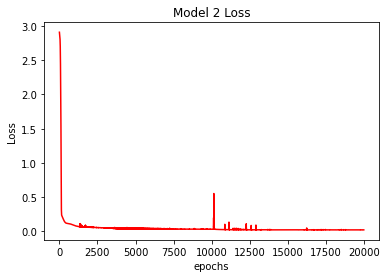

In [10]:
#plot model two epoch vs loss
plt.plot(model_two_epochs,model_two_err,color="red")
plt.title('Model 2 Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

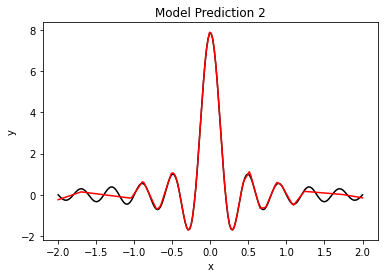

In [11]:
#plot model two predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_two_prediction.data.numpy(),color="red")
plt.title('Model Prediction 2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [12]:
#Optimizer with model three parameter
optimizer_SGD = optim.SGD(model_three.parameters(), lr=0.01, momentum=0.9)
#find prediction,loss for model three
model_three_epochs,model_three_err,model_three_prediction = gradientLoop(model_three,x,y,20000)

Epoch  0  Loss  3.05898
Epoch  500  Loss  0.67315936
Epoch  1000  Loss  0.28802687
Epoch  1500  Loss  0.22393315
Epoch  2000  Loss  0.19969189
Epoch  2500  Loss  0.1799745
Epoch  3000  Loss  0.1617019
Epoch  3500  Loss  0.14544769
Epoch  4000  Loss  0.13383278
Epoch  4500  Loss  0.14822957
Epoch  5000  Loss  0.12870878
Epoch  5500  Loss  0.13052687
Epoch  6000  Loss  0.114215724
Epoch  6500  Loss  0.11150336
Epoch  7000  Loss  0.107678354
Epoch  7500  Loss  0.10476538
Epoch  8000  Loss  0.1027446
Epoch  8500  Loss  0.73461044
Epoch  9000  Loss  0.10148601
Epoch  9500  Loss  0.18928595
Epoch  10000  Loss  0.09736752
Epoch  10500  Loss  0.093692906
Epoch  11000  Loss  0.9928948
Epoch  11500  Loss  1.127252
Epoch  12000  Loss  0.13890295
Epoch  12500  Loss  0.095258646
Epoch  13000  Loss  0.09183161
Epoch  13500  Loss  0.08865922
Epoch  14000  Loss  0.08697664
Epoch  14500  Loss  0.08574906
Epoch  15000  Loss  0.08371585
Epoch  15500  Loss  0.08375355
Epoch  16000  Loss  0.0816689
Epoch  

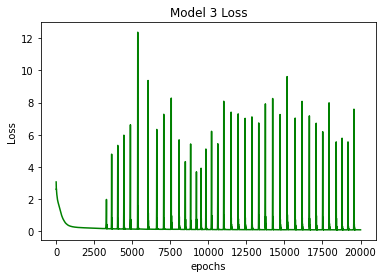

In [13]:
#plot model three epoch vs loss
plt.plot(model_three_epochs,model_three_err,color="green")
plt.title('Model 3 Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.show()

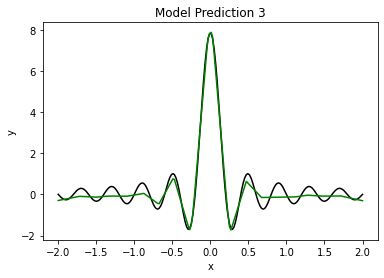

In [14]:
#plot model three predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_three_prediction.data.numpy(),color="green")
plt.title('Model Prediction 3')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

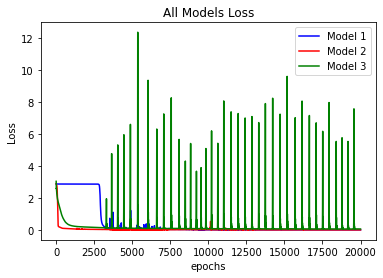

In [15]:
#plot all model epoch vs loss
plt.plot(model_one_epochs,model_one_err,color="blue",label="Model 1")
plt.plot(model_two_epochs,model_two_err,color="red",label="Model 2")
plt.plot(model_three_epochs,model_three_err,color="green",label="Model 3")
plt.title('All Models Loss')
plt.xlabel('epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

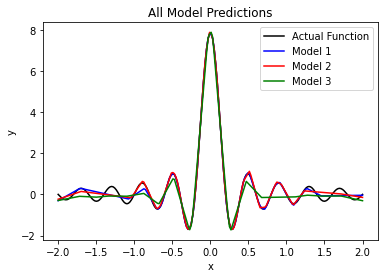

In [16]:
#plot all model predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black",label="Actual Function")
plt.plot(x,model_one_prediction.data.numpy(),color="blue",label="Model 1")
plt.plot(x,model_two_prediction.data.numpy(),color="red",label="Model 2")
plt.plot(x,model_three_prediction.data.numpy(),color="green",label="Model 3")
plt.title('All Model Predictions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

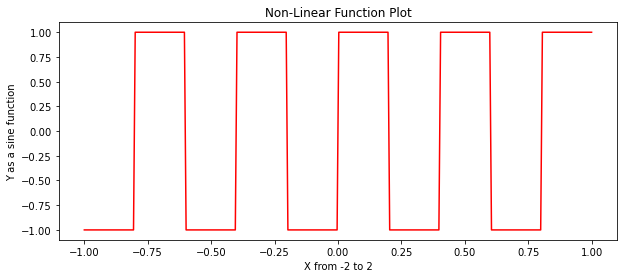

In [23]:
x = torch.unsqueeze(torch.linspace(1,-1,300),dim=1)
y = np.sign(np.sin(5*np.pi*x))

#convert into tensors for pytorch
x = x.clone().detach()
y = y.clone().detach()

#plot the non linear function
plt.figure(figsize=(10,4))
plt.plot(x, y, color = "red")
plt.title('Non-Linear Function Plot')
plt.ylabel('Y as a sine function')
plt.xlabel('X from -2 to 2')

plt.show()

Epoch  0  Loss  1.0337417
Epoch  500  Loss  0.6111185
Epoch  1000  Loss  0.6378598
Epoch  1500  Loss  0.6093894
Epoch  2000  Loss  0.5880138
Epoch  2500  Loss  0.61069745
Epoch  3000  Loss  0.6029767
Epoch  3500  Loss  0.60871035
Epoch  4000  Loss  0.5990977
Epoch  4500  Loss  0.6775893
Epoch  5000  Loss  0.6242442
Epoch  5500  Loss  0.6579921
Epoch  6000  Loss  0.63141906
Epoch  6500  Loss  0.75020236
Epoch  7000  Loss  0.6219003
Epoch  7500  Loss  0.64047307
Epoch  8000  Loss  0.62663287
Epoch  8500  Loss  0.6958766
Epoch  9000  Loss  0.71327955
Epoch  9500  Loss  0.6791686
Epoch  10000  Loss  0.75715995
Epoch  10500  Loss  0.6585426
Epoch  11000  Loss  0.6617763
Epoch  11500  Loss  0.8531322
Epoch  12000  Loss  0.85184383
Epoch  12500  Loss  0.8522195
Epoch  13000  Loss  0.85231173


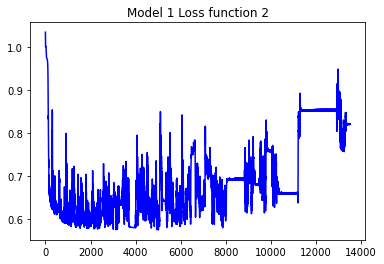

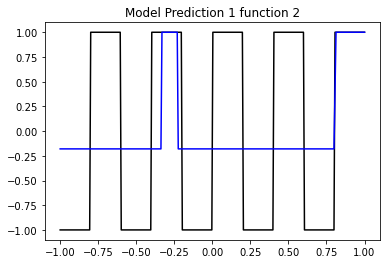

In [24]:
#Define model 1 for function 2
model_one_2 = nn.Sequential(
                nn.Linear(1,5),
                nn.ReLU(),
                nn.Linear(5,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,10),
                nn.ReLU(),
                nn.Linear(10,5),
                nn.ReLU(),
                nn.Linear(5,1)
                )
#Define model 2 for function two
model_two_2 = nn.Sequential(
                nn.Linear(1,10),
                nn.ReLU(),
                nn.Linear(10,18),
                nn.ReLU(),
                nn.Linear(18,15),
                nn.ReLU(),
                nn.Linear(15,4),
                nn.ReLU(),
                nn.Linear(4,1)
)
#Define model 3 for function two
model_three_2 = nn.Sequential(
                nn.Linear(1,190),
                nn.ReLU(),
                nn.Linear(190,1)
)
#Optimizer with model one parameter
optimizer_SGD = optim.Adam(model_one_2.parameters(), lr=0.01)
#find prediction,loss for model one
model_one_epochs2,model_one_err2,model_one_prediction2 = gradientLoop(model_one_2,x,y,13500)
#plot model one epoch vs loss
plt.plot(model_one_epochs2,model_one_err2,color="blue")
plt.title('Model 1 Loss function 2')
plt.show()
#plot model one predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_one_prediction2.data.numpy(),color="blue")
plt.title('Model Prediction 1 function 2')
plt.show()

Epoch  0  Loss  1.0760273
Epoch  500  Loss  0.14567678
Epoch  1000  Loss  0.13043085
Epoch  1500  Loss  0.1287595
Epoch  2000  Loss  0.12441754
Epoch  2500  Loss  0.11594281
Epoch  3000  Loss  0.11562833
Epoch  3500  Loss  0.11161707
Epoch  4000  Loss  0.14964762
Epoch  4500  Loss  0.101827994
Epoch  5000  Loss  0.111554615
Epoch  5500  Loss  0.099553294
Epoch  6000  Loss  0.09404653
Epoch  6500  Loss  0.09903289
Epoch  7000  Loss  0.09934488
Epoch  7500  Loss  0.09924579
Epoch  8000  Loss  0.09090634
Epoch  8500  Loss  0.09172452
Epoch  9000  Loss  0.08815635
Epoch  9500  Loss  0.09046096
Epoch  10000  Loss  0.091375835
Epoch  10500  Loss  0.086785816
Epoch  11000  Loss  0.09197677
Epoch  11500  Loss  0.12745626
Epoch  12000  Loss  0.09383978
Epoch  12500  Loss  0.13978796
Epoch  13000  Loss  0.08439366


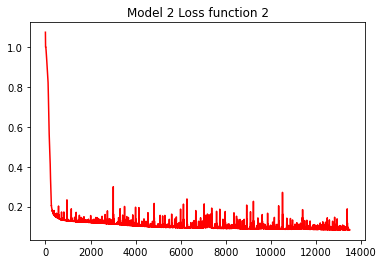

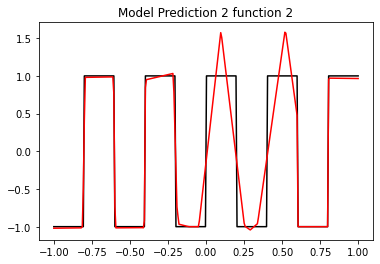

In [25]:
#Optimizer with model one parameter
optimizer_SGD = optim.Adam(model_two_2.parameters(), lr=0.01)
#find prediction,loss for model one
model_two_epochs2,model_two_err2,model_two_prediction2 = gradientLoop(model_two_2,x,y,13500)
#plot model one epoch vs loss
plt.plot(model_two_epochs2,model_two_err2,color="red")
plt.title('Model 2 Loss function 2')
plt.show()
#plot model one predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_two_prediction2.data.numpy(),color="red")
plt.title('Model Prediction 2 function 2')
plt.show()

Epoch  0  Loss  1.048214
Epoch  500  Loss  0.4674476
Epoch  1000  Loss  0.32829174
Epoch  1500  Loss  0.27869788
Epoch  2000  Loss  0.25428757
Epoch  2500  Loss  0.24062096
Epoch  3000  Loss  0.23228106
Epoch  3500  Loss  0.22667223
Epoch  4000  Loss  0.24974938
Epoch  4500  Loss  0.21958229
Epoch  5000  Loss  0.21717305
Epoch  5500  Loss  0.21611063
Epoch  6000  Loss  0.21374421
Epoch  6500  Loss  0.21249671
Epoch  7000  Loss  0.21137606
Epoch  7500  Loss  0.21042179
Epoch  8000  Loss  0.20951469
Epoch  8500  Loss  0.20829058
Epoch  9000  Loss  0.20689227
Epoch  9500  Loss  0.20560408
Epoch  10000  Loss  0.2040779
Epoch  10500  Loss  0.2046329
Epoch  11000  Loss  0.20115031
Epoch  11500  Loss  0.19976963
Epoch  12000  Loss  0.19835062
Epoch  12500  Loss  0.19813253
Epoch  13000  Loss  0.20449094


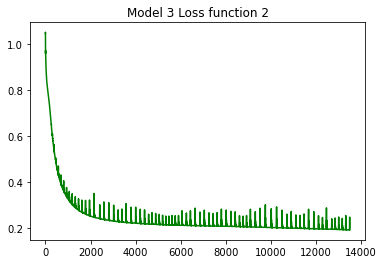

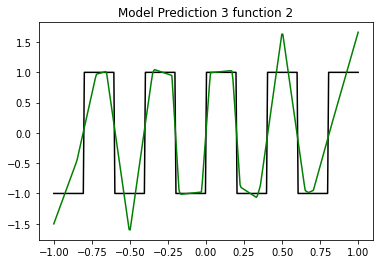

In [26]:
#Optimizer with model three parameter
optimizer_SGD = optim.Adam(model_three_2.parameters(), lr=0.01)
#find prediction,loss for model three for 2nd function
model_three_epochs2,model_three_err2,model_three_prediction2 = gradientLoop(model_three_2,x,y,13500)
#plot model one epoch vs loss
plt.plot(model_three_epochs2,model_three_err2,color="green")
plt.title('Model 3 Loss function 2')
plt.show()
#plot model one predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black")
plt.plot(x,model_three_prediction2.data.numpy(),color="green")
plt.title('Model Prediction 3 function 2')
plt.show()

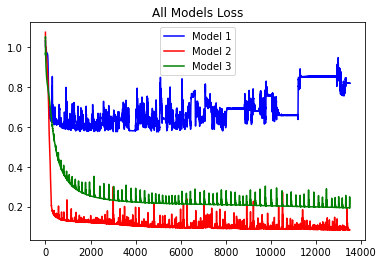

In [27]:
#plot all model epoch vs loss
#plt.plot(model_one_epochs,model_one_err,color="blue")
plt.plot(model_one_epochs2,model_one_err2,color="blue",label="Model 1")
plt.plot(model_two_epochs2,model_two_err2,color="red",label="Model 2")
plt.plot(model_three_epochs2,model_three_err2,color="green",label="Model 3")
plt.title('All Models Loss')
plt.legend()
plt.show()

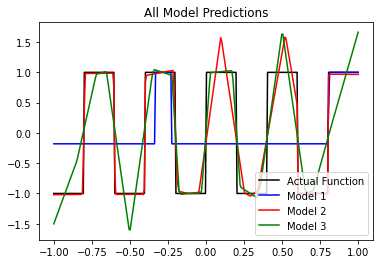

In [28]:
#plot all model predicted and actual
plt.plot(x.numpy(),y.numpy(),color="black",label="Actual Function")
plt.plot(x,model_one_prediction2.data.numpy(),color="blue",label="Model 1")
plt.plot(x,model_two_prediction2.data.numpy(),color="red",label="Model 2")
plt.plot(x,model_three_prediction2.data.numpy(),color="green",label="Model 3")
plt.title('All Model Predictions')
plt.legend()
plt.show()